## Classification project on a imbalanced data 

Learn how to clean the data, apply the statistical techniques (SQL) and visulizations (Tableau), apply logistic regression on a imbalanced data to find the best model for predicting whether the customer will accept the credit card offer or not.

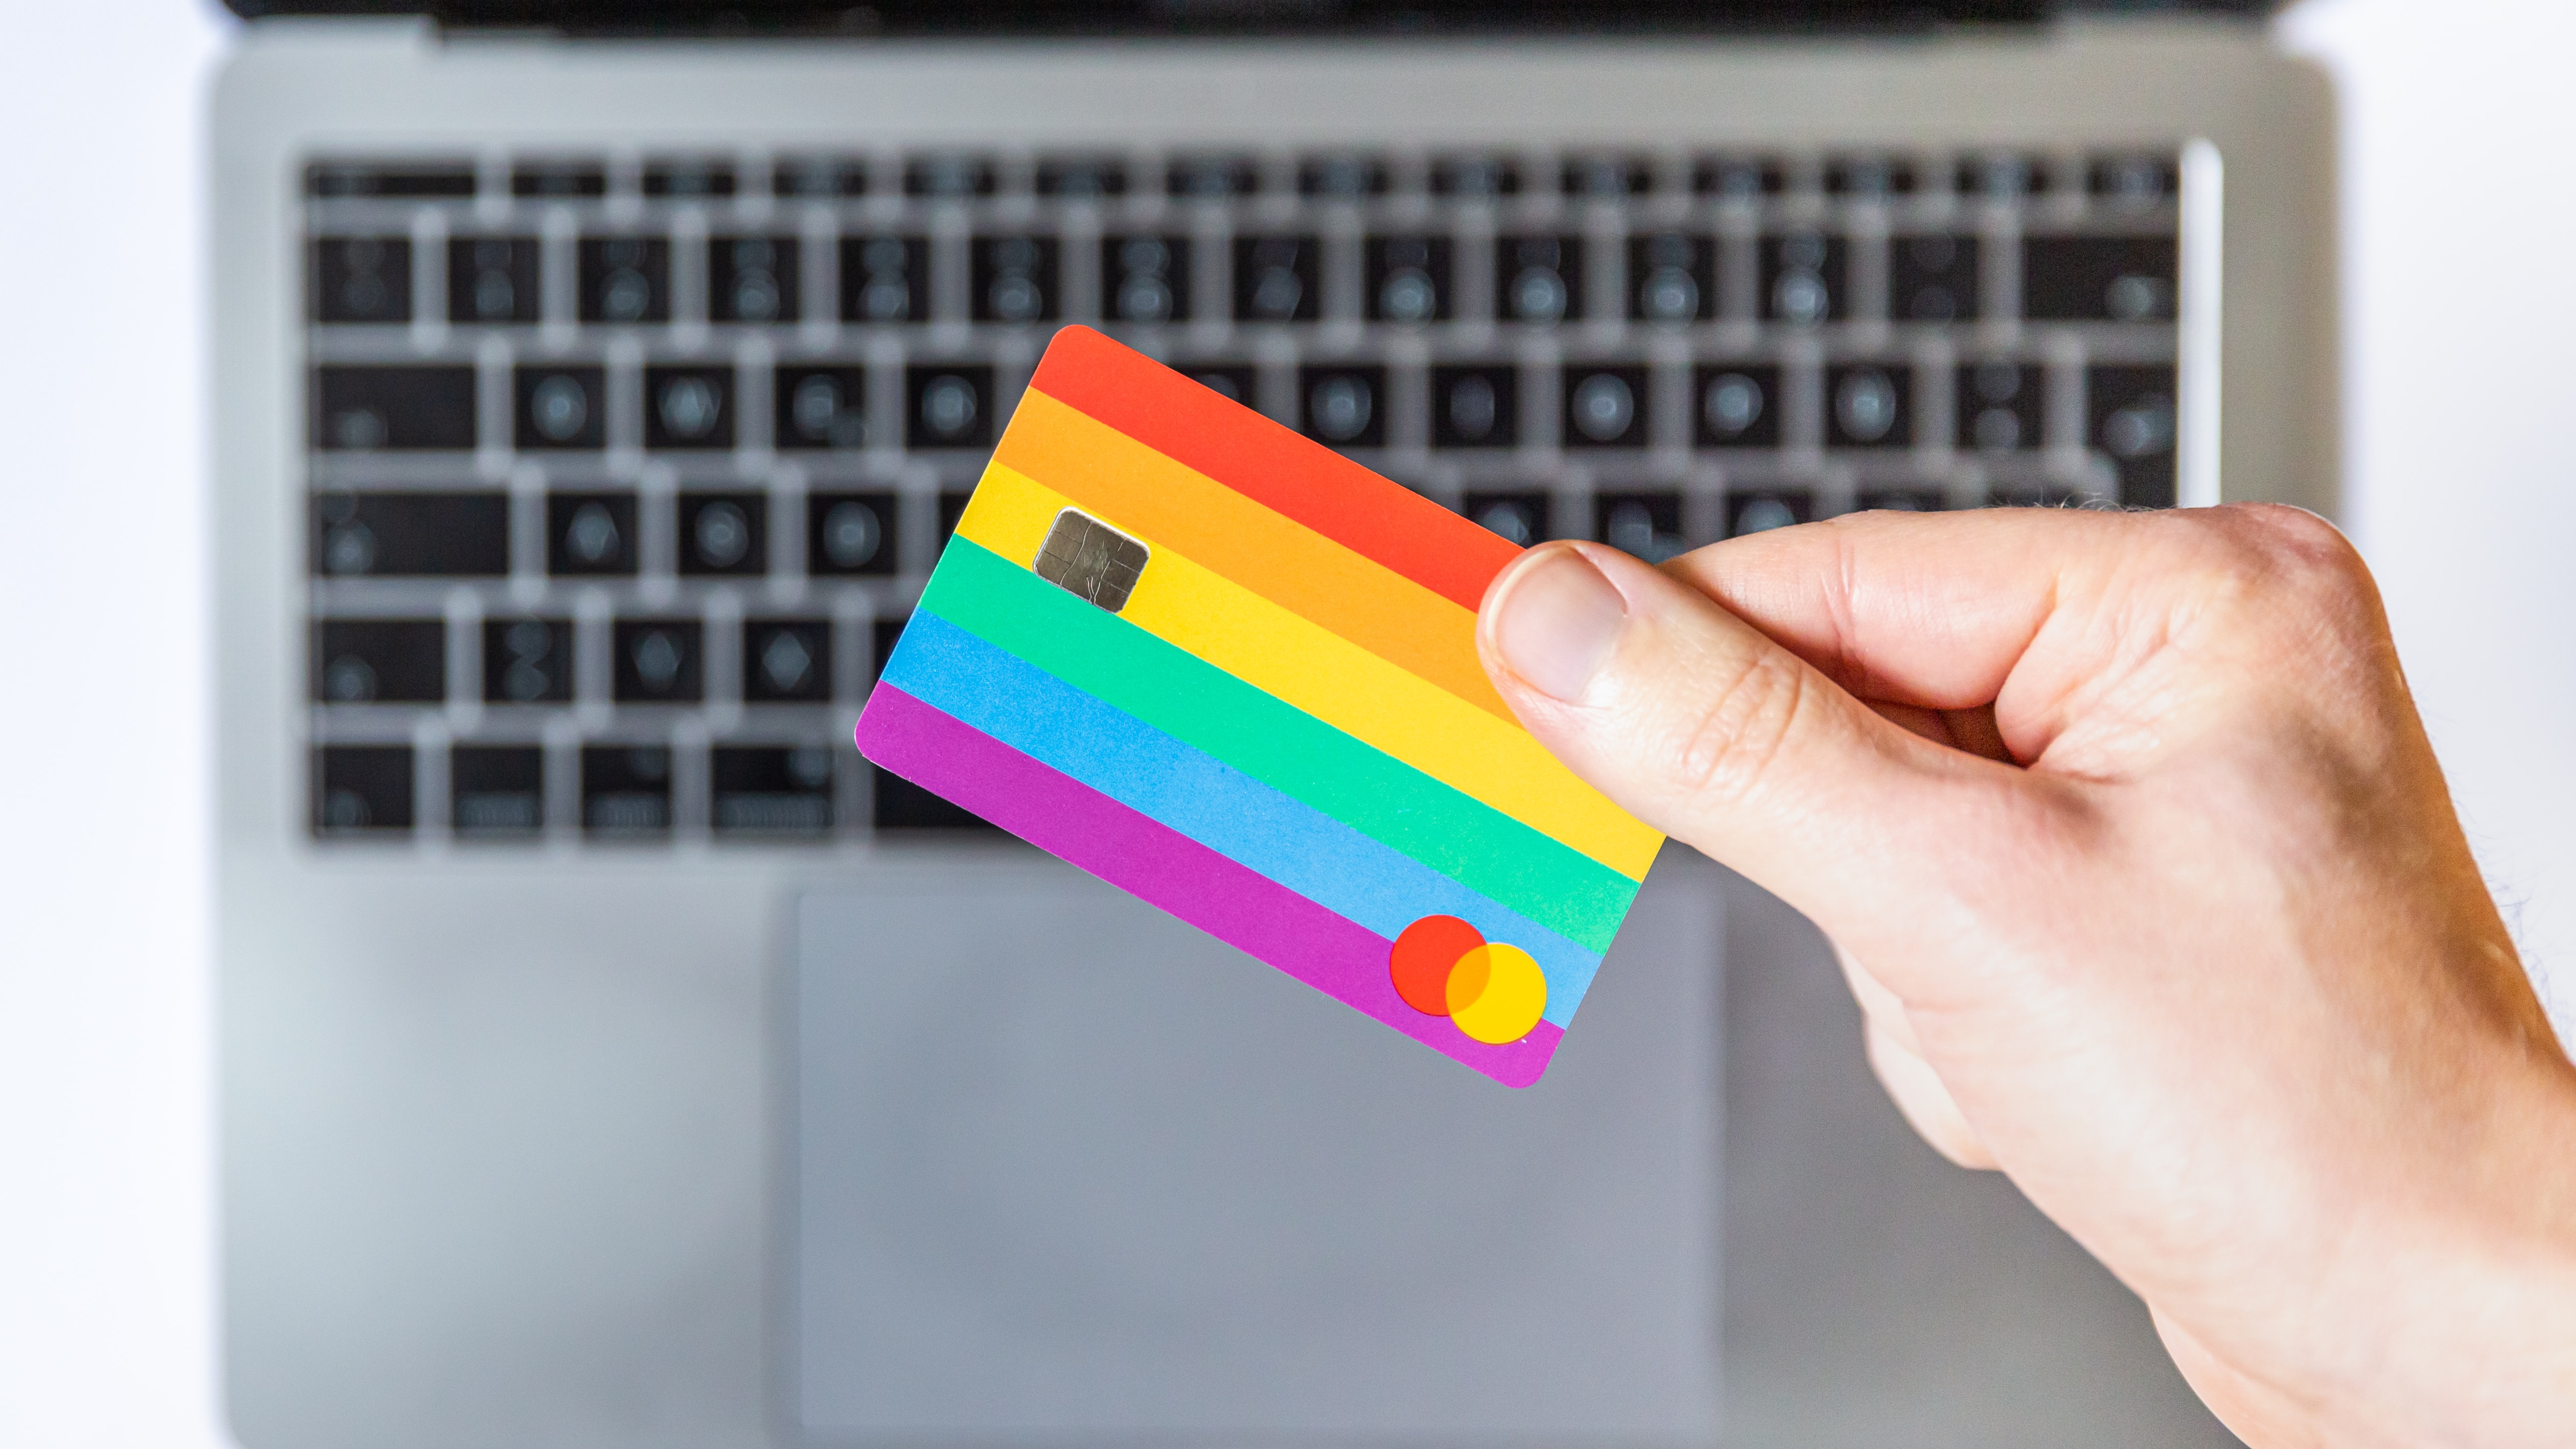

In [1]:
from IPython import display
display.Image("image2.jpg", width= 400, height= 100)

## Procedures
1. import libraries
2. load the data ('credit_card_data')
3. Analysis in SQL (details above 'Exploring the data in SQL')
4. data exploration and cleaning
- Understand the features:
- Deal with duplicates, NaN values
- Deal with categorical and numerical variables and convert if necesssary
5. Data visualization:
Objectives
- understand the overview of categorical and numerical variables
- understand the relationship between offer accepted customer and each variables
6. EDA
- Correlation matrix
- Apply ChiSquare test:
in order to determine significant relationship between two categorical variables
- understand the data distribusion of numerical variables
7. Data processing and feature engineering
- apply boxcox transformation
- remove outliers
8. Train/test split, standardize and encoding
- Extract the target variable 'Offer accepted'
- Train/test split
- standardize the numerical variables
- encode the categorical variables
9. Scaling the imbalanced data 
- use smote metrix to fix the imbalanced data
10. Model evaluation and results
- Logistic regression
- KNN Classifier

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import pickle


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load the data 

In [3]:
data = pd.read_csv('creditcardmarketing.csv')
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


### Clean the columns and save as a new file (credit_card_data) to import into SQL Workbench
Column cleaning
- lower case
- replace space to '_'
- remove #
- save the dataframe as new file

In [4]:

data.columns = [columns.lower().replace(' ', '_').replace('# ', '') for columns in data.columns]
data.columns = [columns.replace('#_', '') for columns in data.columns]


#### Now save the dataframe into csv file to import it into MySQL Workbench

In [5]:
data.to_csv('credit_card_data.csv', index=False)
data.to_excel('credit_card_data.xls', index=False)

## Data analysis on SQL 
Please refer to the mysql file

## Data exploration & cleaning


### Check the stats of the data

In [6]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [7]:
data.shape

(18000, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [9]:
data.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### Drop duplicates
No duplicates found

In [10]:
data = data.drop_duplicates()

data.shape

(18000, 17)

### Check Null values

In [11]:
# Count null values
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [12]:
# Percentage of the null values
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
q4_balance,0.133333
q3_balance,0.133333
q2_balance,0.133333
q1_balance,0.133333
average_balance,0.133333
homes_owned,0.000000
own_your_home,0.000000
household_size,0.000000
customer_number,0.000000
offer_accepted,0.000000


In [13]:
# check where are the null values in the dataframe
data_null = data[data.isna().any(axis=1)]
data_null

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [14]:
data['q4_balance'].value_counts()

154.0     26
419.0     26
497.0     26
297.0     24
441.0     24
          ..
1089.0     1
1553.0     1
2124.0     1
2035.0     1
2155.0     1
Name: q4_balance, Length: 2184, dtype: int64

#### Fill in Null values with the mean
- From above data_null dataframe, all 24 rows consists of null values in same columns
- since the values are all numerical, null values will be replaced with the mean

In [88]:
def fill_mean(data, columns):
    """
    data: dataframe
    columns: columns
    return: modified dataframe with mean filled 
    """
    
    for col in columns:
        mean_value = data[columns].mean()
        data[columns] = data[columns].fillna(mean_value)
    
    return data

In [16]:
fill_mean(data, ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'])


,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [17]:
# double check if the nullvalues are zero
data.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [18]:
# check if the null values are correctly filled with mean
data.describe() 

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,619.663515,457.097214,553.083487,558.628553
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,393.000000,664.000000,633.000000,363.750000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1520.250000,1342.000000,1462.000000,1211.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


### Check the imbalance of the target values


In [19]:
data['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

### Check the data types (numericals)

In [20]:
data_num = data.select_dtypes(np.number)
data_num

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17995,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


### Drop customer_number
Customer_id is a unique value so there are 2 option (drop or change into Index). In this project the customer_number will be dropeed

In [21]:
data = data.drop(['customer_number'], axis =1)
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Check the data types (categoricals)

In [22]:
data_cat = data.select_dtypes(np.object)
data_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


Data exploration and cleaning completed!!

## Data visualization
Objectives
- 6.1: understand the overview of categorical data
- 6.2: understand the overview of numerical data
- 6.3: understand the relationship between offer accepted customer and each features

### Check categorical data

In [23]:
data_vis = data.copy()
data_vis

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [24]:
# See the data in the categorical columns
def barplot_cat(data):
    for column in data_vis.select_dtypes(np.object):
        sns.countplot(column, data = data_vis, color = 'skyblue')
        results = plt.show()
    return results

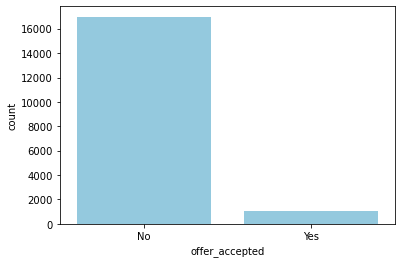

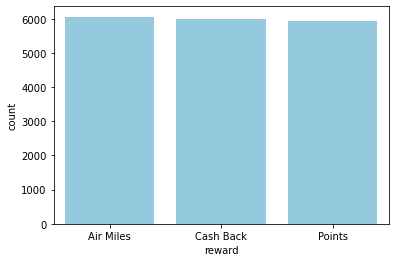

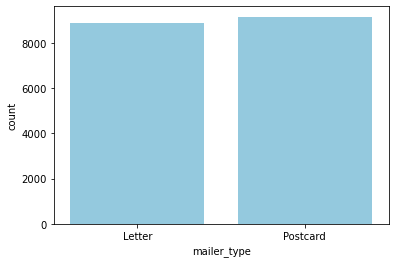

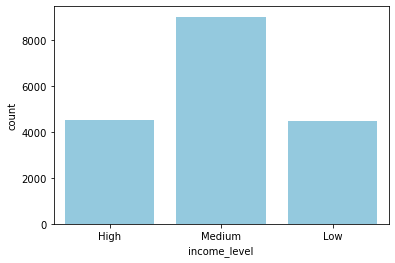

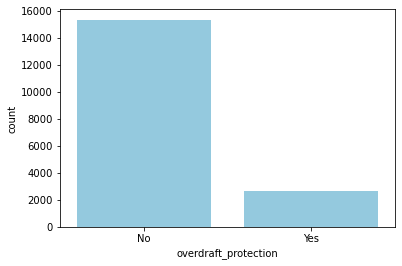

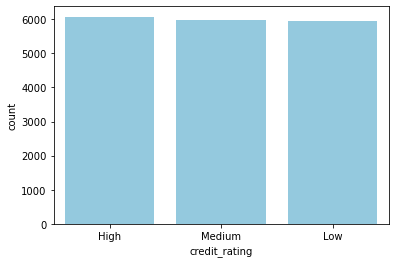

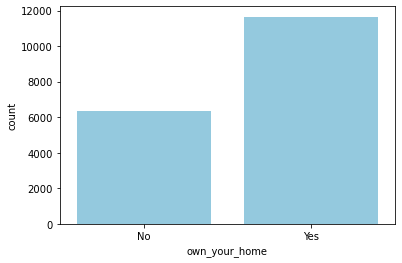

In [25]:
barplot_cat(data_vis)

In [26]:
#for column in data_vis.select_dtypes(np.object):
def pie_columns(columns):
    for col in columns:
        plt.pie(data[col].value_counts(), autopct='%1.0f%%')
        plt.title(col)
        results = plt.show()
    return results

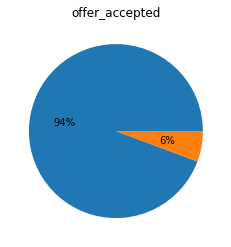

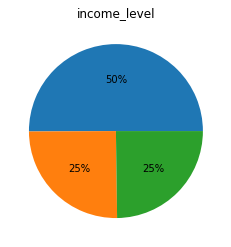

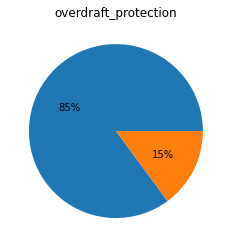

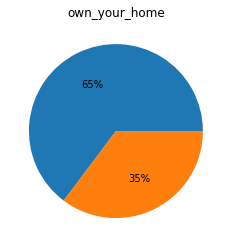

In [27]:
pie_columns(['offer_accepted', 'income_level', 'overdraft_protection', 'own_your_home'])

#### Findings in categorical columns:
- Imbalance data in target variable (column: 'offer_accepted'): 94% (No) vs 6% (Yes)
- Almost equal distrubution on columns: reward, mailer_type, credit_rating
- 50% of the customers are belonging to medium income_level
- 85% of customer have overdraft_protection
- 65% of the customer owns a home

### Check numerical data

In [28]:
data_vis.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

In [29]:
# check barplot in the specifit data (did not include avg_balance, q1-q4 balance as it is not relavant)
def barplot_specific_columns(columns):
    for col in columns:
        sns.countplot(col, data = data_vis, palette = 'rainbow')
        results = plt.show()
    return results

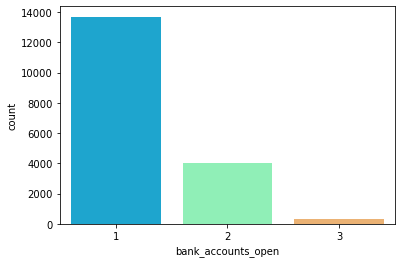

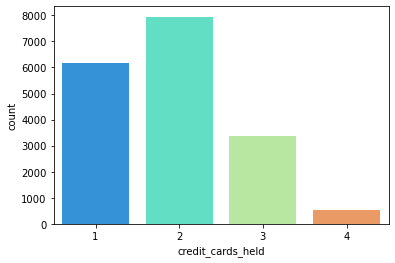

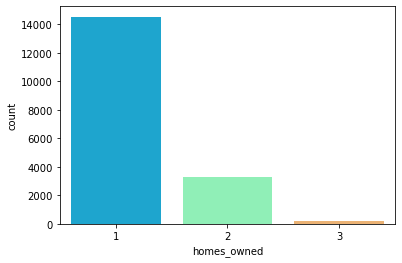

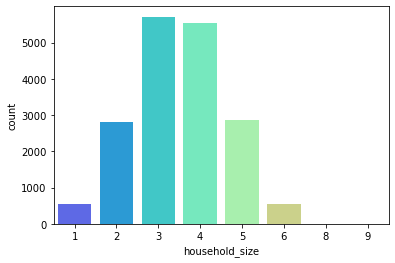

In [30]:
barplot_specific_columns(['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

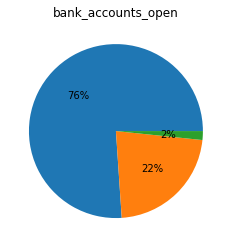

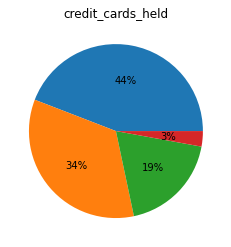

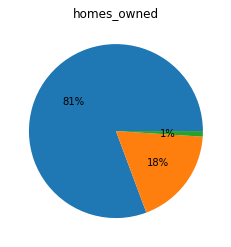

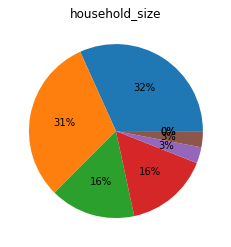

In [31]:
# See the percentile in the categorical columns
pie_columns(['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

In [32]:

def displot_columns(columns):
    for col in columns:
        sns.displot(data_vis[col])
        results = plt.show()
    return results
           

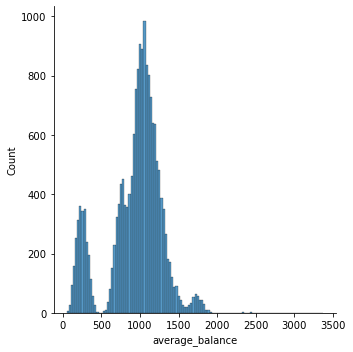

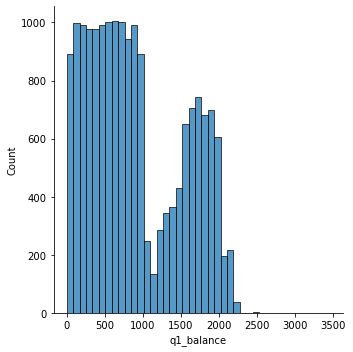

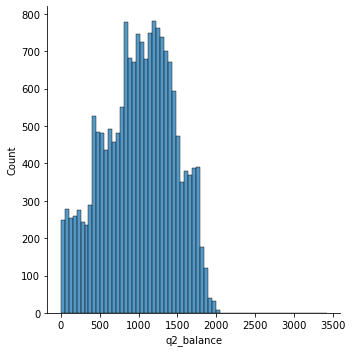

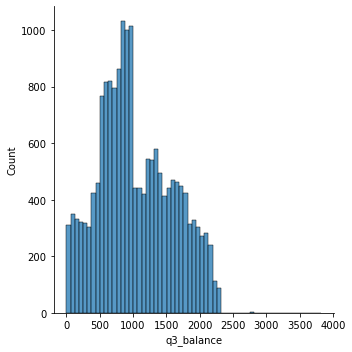

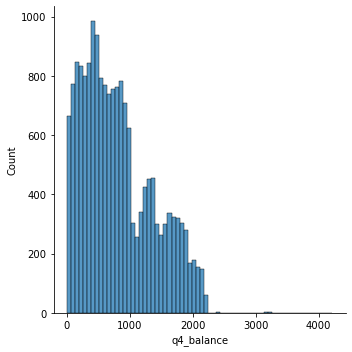

In [33]:
displot_columns(['average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'])

#### Findings in numerical columns
- 76% of the customer owns 1 bank account
- 81% of the customer owns their home
- The average_blanace and q1_balance is skewed to the left



### Relationship between offer accepted customer and the features

In [34]:
def countplot_columns(columns):
    for i in columns:
        sns.countplot(x = i, hue = 'offer_accepted', data = data_vis, palette = 'rainbow' )
        results = plt.show()
    return results

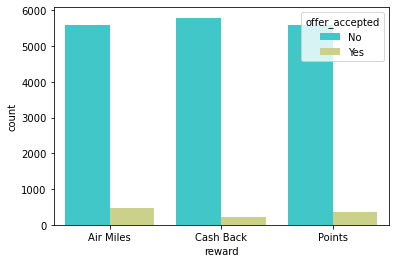

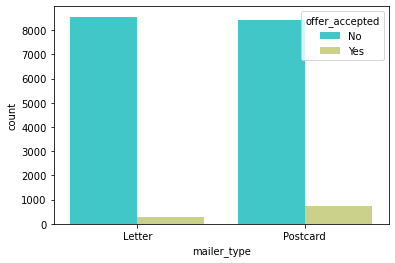

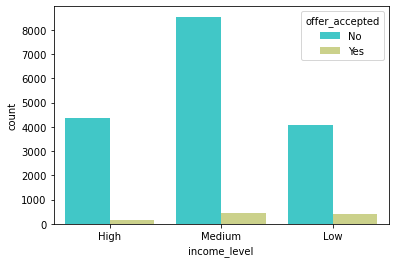

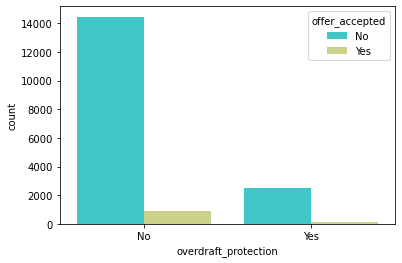

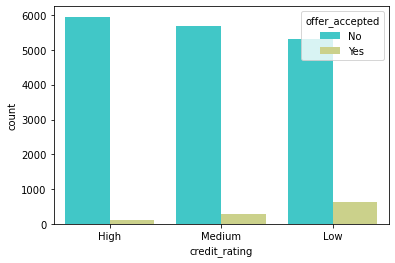

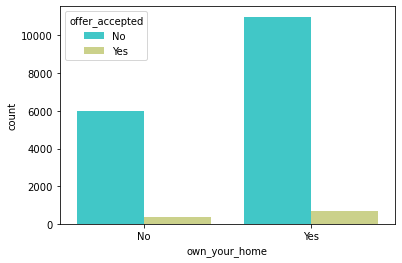

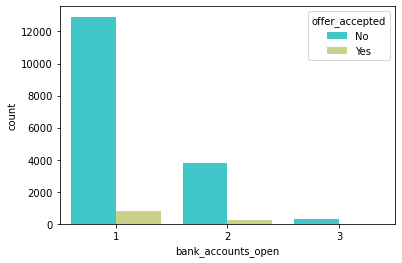

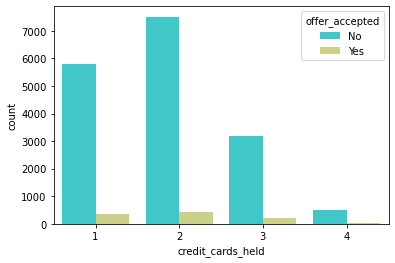

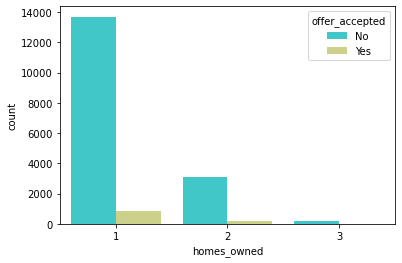

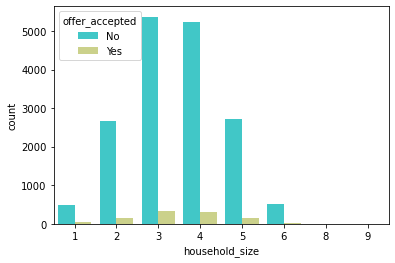

In [35]:
countplot_columns(['reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home','bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size'])

### Findings:
Customer who accepted the offer are/has:
- Air Miles as rewards
- received credit card offerings in postcard 
- do not have overdraft protection
- low credit ratings
- owns a home
- mostly have 1 bank account open
- holds 2 credit cards
- holds 1 owned house
- household_size of 3 to 4 people

## EDA

In [36]:
# make a copy of the data so the cleaned data is not lost
data1 = data.copy() 

### Correlation matrix

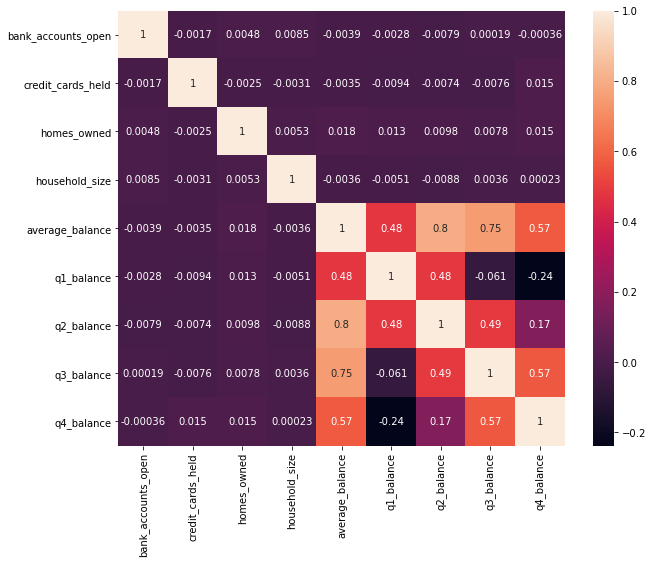

In [37]:
corr_matrix=data1.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Findings:
- high correlations between average_balance and q2_balance, q3_balance
- drop average_balance

In [38]:
data1 = data1.drop('average_balance', axis = 1)
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,626.0,983.0,865.0,1615.0


### ChiSquare test - determine if there is a significant relationship between two categorical variables

In [39]:
data2 = data.copy()

In [40]:
data2_cat = data2.select_dtypes(np.object)
data2_cat.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home'],
      dtype='object')

#### Create a function to test all categorical variables

In [41]:
def col_cat_val(cols):
    for i in cols:
        for j in cols:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                result = chi2_contingency(data_crosstab, correction=False)
                print('Result for', i, '&', j, ':', result )
    
    return 

In [42]:
col_cat_val(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home'])

Result for offer_accepted & reward : (101.99764699462307, 7.103826919269613e-23, 2, array([[5716.53316667, 5658.05683333, 5602.41      ],
       [ 344.46683333,  340.94316667,  337.59      ]]))
Result for offer_accepted & mailer_type : (171.13002056177373, 4.1914413632040166e-39, 1, array([[8349.8545, 8627.1455],
       [ 503.1455,  519.8545]]))
Result for offer_accepted & income_level : (114.36759816901265, 1.463496214215802e-25, 2, array([[4268.77233333, 4207.4665    , 8500.76116667],
       [ 257.22766667,  253.5335    ,  512.23883333]]))
Result for offer_accepted & overdraft_protection : (0.1443392833541908, 0.7040047254941093, 1, array([[14451.19966667,  2525.80033333],
       [  870.80033333,   152.19966667]]))
Result for offer_accepted & credit_rating : (443.1289291631658, 5.967269417919593e-97, 2, array([[5725.96483333, 5618.44383333, 5632.59133333],
       [ 345.03516667,  338.55616667,  339.40866667]]))
Result for offer_accepted & own_your_home : (0.0016758285818582151, 0.967

#### Analyze results and conclusion

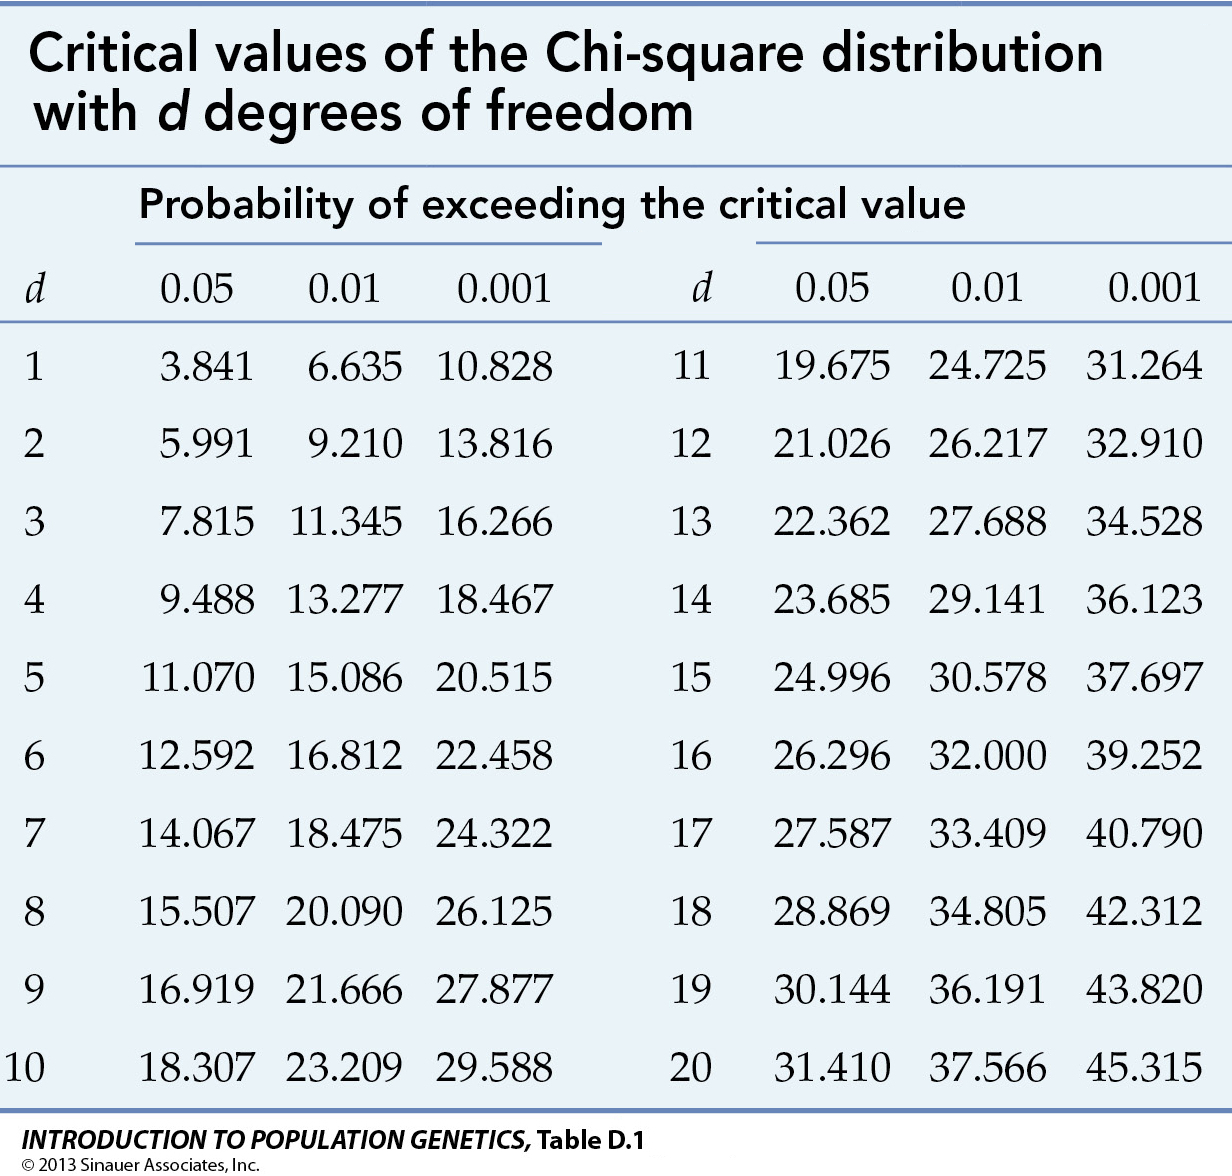

In [43]:
from IPython import display
display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

#### Reward & rest columns:

- Result for reward & mailer_type : (0.8985334599146192, 0.6380958767071728, 2)
    0.89 < 5.991  --> H0 Accepted

- Result for reward & income_level : (2.593947767973481, 0.6278956241169493, 4)
    2.59 < 9.488 --> H0 Accepted

- Result for reward & overdraft_protection : (1.5212485310861386, 0.467374570081467, 2)
    1.52 < 5.991 --> H0 Accepted

- Result for reward & credit_rating : (2.316082014017522, 0.6778426226084249, 4)
    2.31 < 9.488 --> H0 Accepted

- Result for reward & own_your_home : (1.9199266892849023, 0.3829069213079838, 2)
    1.91 < 5.991 --> H0 Accepted

#### Mailer type and rest columns:

- Result for mailer_type & income_level : (1.0904891434307842, 0.5796999877805373, 2)
    1.09 < 5.991  --> H0 Accepted

- Result for mailer_type & overdraft_protection : (0.14629590973247864, 0.7021005530858899, 1)
    0.14 < 3.841 --> H0 Accepted

- Result for mailer_type & credit_rating : (0.5723021363303353, 0.7511491326540082, 2)
    0.57 < 5.991  --> H0 Accepted

- Result for mailer_type & own_your_home : (0.3399182244560844, 0.5598764281105257, 1)
    0.33 < 3.841 --> H0 Accepted


#### Income level and rest columns: 

- Result for income_level & overdraft_protection : (1.17563881916656, 0.5555373643638557, 2)
    1.17 < 5.991  --> H0 Accepted

- Result for income_level & credit_rating : (3.110919819078809, 0.5394378509869674, 4)
    3.11 < 9.488 --> H0 Accepted

- Result for income_level & own_your_home : (2.129908970121201, 0.34474354539171537, 2)
    2.12 < 5.991  --> H0 Accepted

#### Overdraft protection and rest columns:

- Result for overdraft_protection & credit_rating : (1.3113634637871212, 0.5190880630462248, 2)
    1.311 < 5.991  --> H0 Accepted

- Result for overdraft_protection & own_your_home : (1.20075350362184, 0.2731711292023508, 1)
    1.3 < 3.841 --> H0 Accepted

#### Credit rating and rest columns:

- Result for credit_rating & own_your_home : (1.0865620108797436, 0.5808393854017466, 2)
    1.08 < 5.991  --> H0 Accepted

### Chisquare test results:
"Null Hypothesis' is accepted for all columns meaning that two variables are NOT correlated. Therefore as a result, no columns has to be dropped.

### Check the data distribution

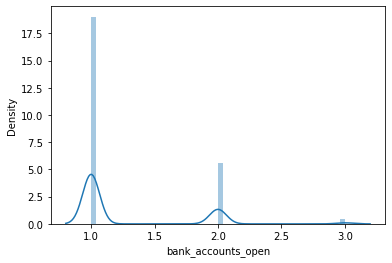

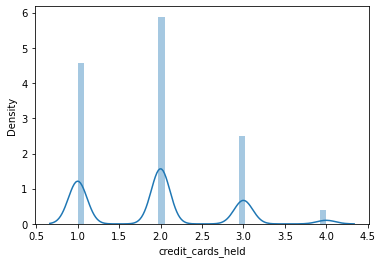

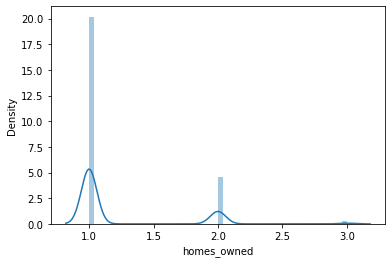

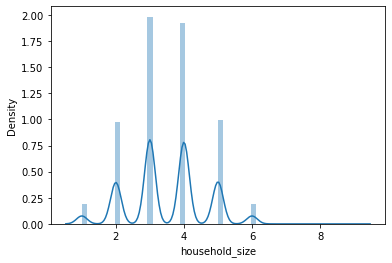

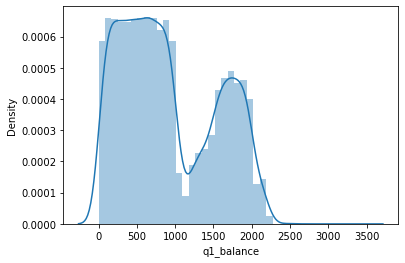

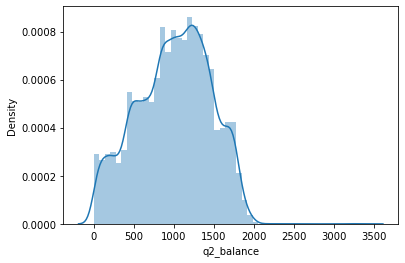

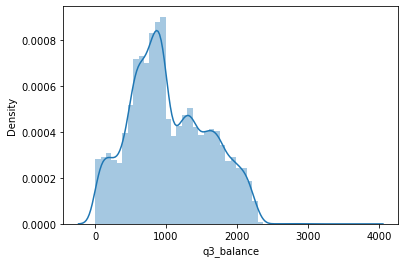

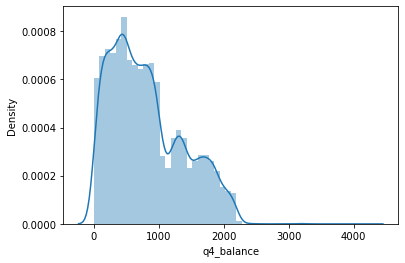

In [44]:

for column in data1.select_dtypes(np.number).columns:
    sns.distplot(data1[column])
    plt.show()

## Data processing, feature engineering

In [45]:
data1.shape

(18000, 15)

### Apply boxcox transform
boxcox will use all lambdas to see the best transformation for each column

In [46]:
def boxcox_transform(data1):
    numeric_cols = data1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data1[column] = np.where(data1[column]<=0, np.NAN, data1[column]) 
        data1[column] = data1[column].fillna(data1[column].mean())
        #print(column)
        transformed_data, ci = stats.boxcox(data1[column])
        data1[column] = transformed_data
        _ci[column] = [ci] 
    return data1, _ci

In [47]:
data1, _ci = boxcox_transform(data1)
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.818039,No,74.088196,641.948172,174.455505,50.666453
1,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.712548,Yes,10.171719,86.052504,27.370949,30.993842
2,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.971838,Yes,34.365591,270.063072,42.616073,25.219542
3,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.818039,No,72.037644,1241.725907,177.086014,33.134063
4,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.000000,4.593784,Yes,83.885335,970.704172,161.815636,30.951910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.712548,Yes,20.406124,53.788326,25.573506,32.304514
17996,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.906588,Yes,56.816308,685.562516,157.348155,37.358270
17997,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.818039,No,54.859399,565.381288,182.617563,61.387229
17998,No,Cash Back,Letter,Medium,0.000000,No,Medium,1.555081,0.142198,0.971838,Yes,45.180070,715.239852,148.233804,63.718093


### Remove the outliers 
See 6.3 boxplot

In [48]:
# define the function of removing the outliers
def remove_outliers(data1, threshold=1.5, in_columns=data1.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data1[column],75)
            lower = np.percentile(data1[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data1 = data1[(data1[column]>lower_limit) & (data1[column]<upper_limit)]
    return data1


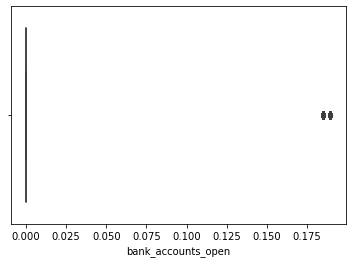

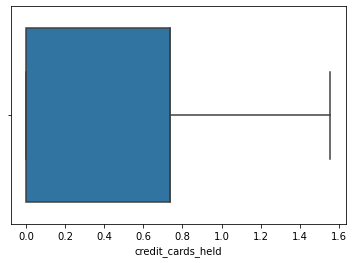

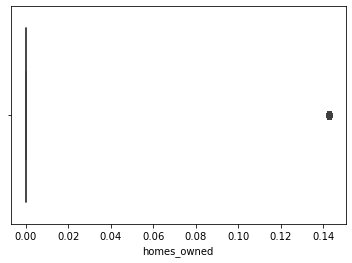

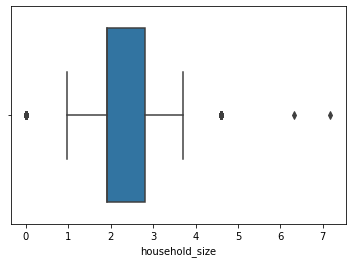

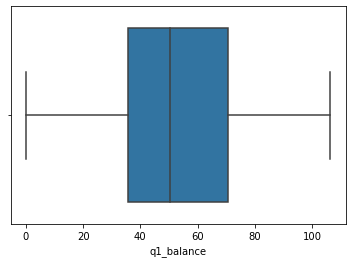

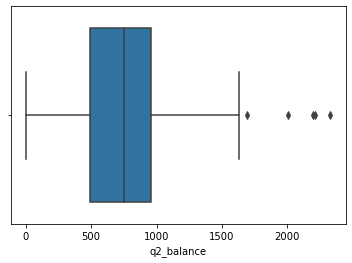

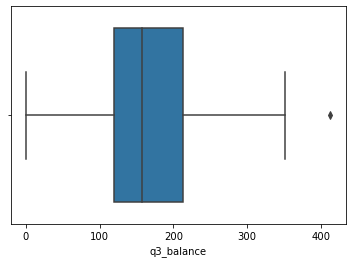

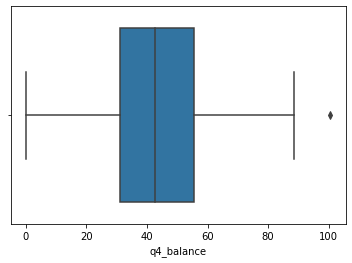

In [49]:

for column in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[column])
    plt.show()

Findings:
- outliers in columns: household_size, average_balance, q2_balance, q3_balance, q4_balance

In [50]:
data1 = remove_outliers(data1, threshold=1.5, in_columns= ['household_size', 'q2_balance', 'q3_balance', 'q4_balance'])
data1

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.818039,No,74.088196,641.948172,174.455505,50.666453
1,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.712548,Yes,10.171719,86.052504,27.370949,30.993842
2,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.971838,Yes,34.365591,270.063072,42.616073,25.219542
3,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.818039,No,72.037644,1241.725907,177.086014,33.134063
5,No,Air Miles,Letter,Medium,0.000000,No,High,1.202918,0.000000,2.818039,No,77.939556,976.122896,134.305789,36.034178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.712548,Yes,20.406124,53.788326,25.573506,32.304514
17996,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.906588,Yes,56.816308,685.562516,157.348155,37.358270
17997,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.818039,No,54.859399,565.381288,182.617563,61.387229
17998,No,Cash Back,Letter,Medium,0.000000,No,Medium,1.555081,0.142198,0.971838,Yes,45.180070,715.239852,148.233804,63.718093


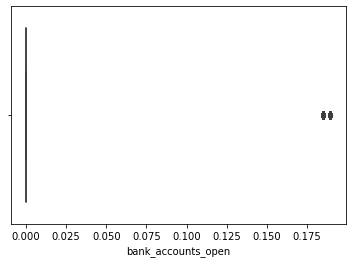

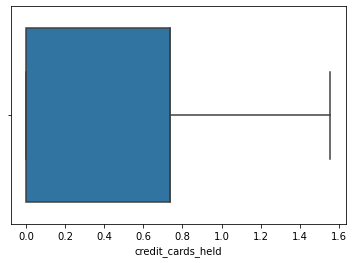

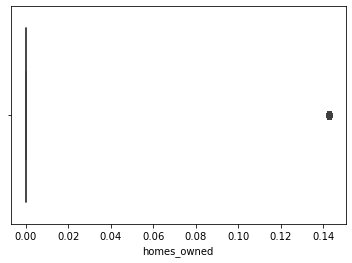

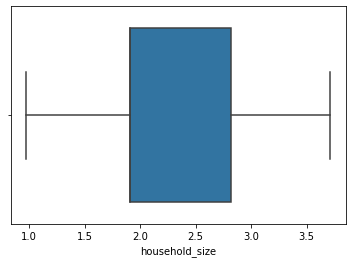

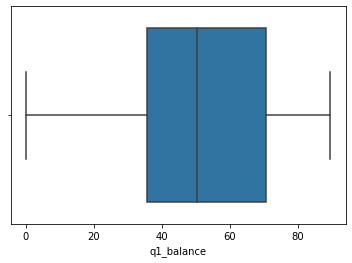

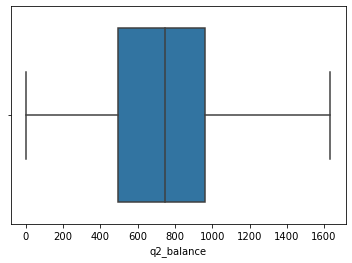

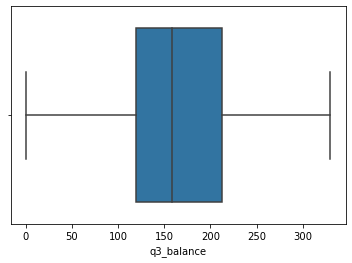

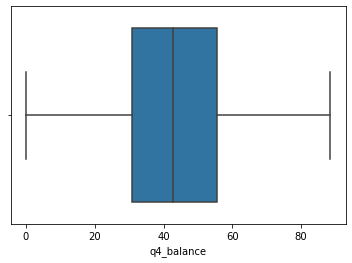

In [51]:
for column in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[column])
    plt.show()

## Train/test split, standardize and encoding

###  Extract the target variable and train/test split

In [52]:
X = data1.drop('offer_accepted', axis =1)
y = data1['offer_accepted']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

### Scaling the numerical and save the transformation in file 

In [55]:
transformer = StandardScaler().fit(X_train_num)
x_train_stand = transformer.transform(X_train_num)


# saving in a pickle
with open('num_train_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('num_train_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_n = loaded_transformer.transform(X_train_num)


In [56]:
transformer = StandardScaler().fit(X_test_num)
X_test_n = transformer.transform(X_test_num)

In [57]:
X_train_n.shape, X_test_n.shape

((13532, 8), (3384, 8))

### Encoding the categoricals and save the encoding in file

In [58]:
X_train_cat = X_train.select_dtypes(exclude=np.number)

In [59]:
X_train_cat

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
10365,Cash Back,Postcard,Medium,No,Low,Yes
4378,Points,Postcard,Medium,No,Medium,Yes
16063,Cash Back,Letter,High,No,Low,No
8787,Cash Back,Letter,Low,No,Low,Yes
6131,Air Miles,Postcard,High,No,High,No
...,...,...,...,...,...,...
12015,Cash Back,Letter,Medium,No,Medium,No
12727,Air Miles,Letter,Medium,Yes,Low,No
5741,Air Miles,Letter,Low,No,Low,Yes
910,Points,Letter,Medium,No,High,Yes


In [60]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
encoded_train = encoder.transform(X_train_cat).toarray()

In [61]:
encoded_train

array([[1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
# saving in a pickle
with open('cat_train_encoder.pickle', 'wb') as file:
    pickle.dump(encoder, file)
    
#loading from a pickle  
with open('cat_train_encoder.pickle', 'rb') as file:
    loaded_encoder = pickle.load(file)

encoded_train = loaded_encoder.transform(X_train_cat).toarray()


In [63]:
X_test_cat = X_test.select_dtypes(exclude=np.number)

In [64]:
X_test_cat

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
17029,Points,Postcard,Medium,No,High,Yes
13913,Air Miles,Letter,High,No,High,Yes
15224,Cash Back,Letter,High,No,High,No
5826,Cash Back,Postcard,High,No,High,No
16978,Air Miles,Postcard,Medium,No,High,Yes
...,...,...,...,...,...,...
4527,Air Miles,Letter,Medium,No,High,No
9434,Points,Postcard,High,No,Medium,Yes
3161,Air Miles,Letter,High,Yes,Medium,Yes
3271,Points,Postcard,Medium,Yes,Low,Yes


In [65]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_test_cat)
encoded_test = encoder.transform(X_test_cat).toarray()

In [66]:
X_train = np.concatenate((X_train_n, encoded_train), axis=1)

In [67]:
# check if the concat worked
X_train 

array([[-0.5575345 ,  0.29820335,  2.04753519, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.78969967,  1.2891966 , -0.48814559, ...,  0.        ,
         1.        ,  1.        ],
       [-0.5575345 , -1.25161334,  2.04753519, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.5575345 ,  1.2891966 , -0.48814559, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.78969967,  0.29820335, -0.48814559, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5575345 , -1.25161334, -0.48814559, ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
X_test = np.concatenate((X_test_n, encoded_test), axis=1)

In [69]:
# check if the concat worked
X_test

array([[-0.57733666,  0.27621731, -0.49222958, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.72828418, -1.24899105, -0.49222958, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57733666, -1.24899105, -0.49222958, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.72828418,  0.27621731,  2.03064456, ...,  0.        ,
         1.        ,  1.        ],
       [-0.57733666, -1.24899105, -0.49222958, ...,  1.        ,
         0.        ,  1.        ],
       [-0.57733666, -1.24899105, -0.49222958, ...,  1.        ,
         0.        ,  0.        ]])

In [70]:
X_train.shape, X_test.shape

((13532, 17), (3384, 17))

## Scaling the imbalanced data 

In [71]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

No     12762
Yes    12762
Name: offer_accepted, dtype: int64

In [72]:
X_sm.shape, y_sm.shape, X_test.shape, y_test.shape

((25524, 17), (25524,), (3384, 17), (3384,))

## Model evaluation

### Logistic regression

In [73]:

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [74]:
classification.score(X_test, y_test) # checking the score without the need for predictions

0.6985815602836879

In [75]:
# To get predictions
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[2248,  954],
       [  66,  116]])

In [76]:

print(classification_report(y_test, classification.predict(X_test)))

              precision    recall  f1-score   support

          No       0.97      0.70      0.82      3202
         Yes       0.11      0.64      0.19       182

    accuracy                           0.70      3384
   macro avg       0.54      0.67      0.50      3384
weighted avg       0.93      0.70      0.78      3384



<AxesSubplot:>

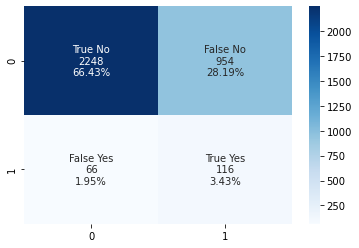

In [77]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 
               'False Yes', 'True Yes'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

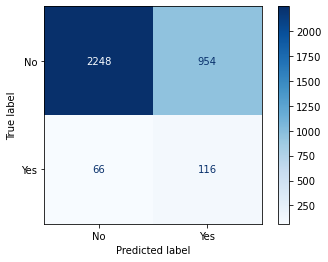

In [78]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

### KNN classifier

#### Find the best 'k' by testing different 'k' values

In [79]:
X_knn, y_knn = smote.fit_resample(X_train, y_train)
y_knn.value_counts()

No     12762
Yes    12762
Name: offer_accepted, dtype: int64

In [80]:
y_knn.value_counts()

No     12762
Yes    12762
Name: offer_accepted, dtype: int64

In [81]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_knn, y_knn)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.8389479905437353,
 0.7745271867612293,
 0.732565011820331,
 0.6935579196217494,
 0.6660756501182034,
 0.6436170212765957,
 0.6205673758865248,
 0.6031323877068558,
 0.5839243498817966,
 0.5709219858156028]

Text(0, 0.5, 'Accuracy')

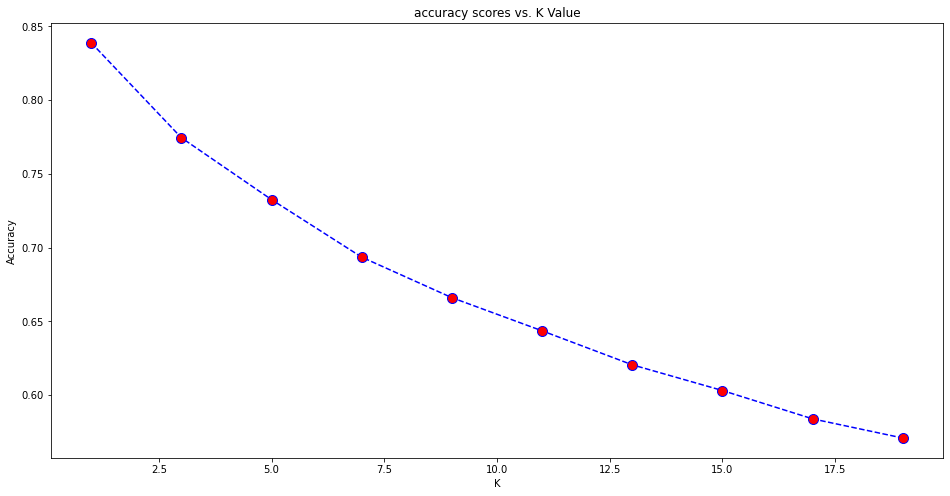

In [82]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Fit into the model with k = 5

In [83]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_sm, y_sm)

KNeighborsClassifier()

In [84]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.726063829787234


In [85]:
# To get predictions
predictions_knn = model.predict(X_test)
confusion_matrix(y_test, predictions_knn)

array([[2391,  811],
       [ 116,   66]])

In [86]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.95      0.75      0.84      3202
         Yes       0.08      0.36      0.12       182

    accuracy                           0.73      3384
   macro avg       0.51      0.55      0.48      3384
weighted avg       0.91      0.73      0.80      3384



<AxesSubplot:>

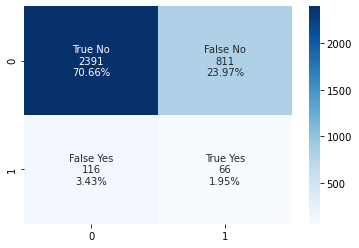

In [87]:
cf_matrix = confusion_matrix(y_test, predictions_knn)
group_names = ['True No', 'False No', 
               'False Yes', 'True Yes'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Conclusion


### Model and evaluation
In this studies, due to the imbalanced data in the target variable,
Smote metrix was used to fixed the imbalanced data.
The studies implemented two different models: Linear regression, KNN Classifier
Since the studies focuses more on obtaining more customers to take the offer rather than spotting the exact customer who will take the offer, we want to see how the result of 'recall' is.
Below are the results of the recall score.

- Linear regression: 0.62
- KNN Classification: 0.37

Linear regression model has ran better than the KNN.
In this particular studies, smote does not function well with KNN classifier.

### Analysis results
Below are the results of the customers who are more likely to accept the credit card offerings.
- Household_size of 3 to 4 people
- DO NOT have overdraft protection
- Low credit ratings
- Holds 1 bank account
- Holds 1 owned house
In addition, customers who receives the offer invitation via postcards are more likely to accept the offerings..
